In [1]:
import os
import glob
import datetime
import numpy as np
import pandas as pd
import xarray as xr

from scipy import stats
from scipy import integrate
from numpy import exp
import math
from pymannkendall import original_test as mk

from osgeo import gdal
import pyhdf
from pyhdf.SD import SD
import geopandas as gpd
import rasterio
import rioxarray as rxr

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as mticker
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import matplotlib.colors as mcolors
plt.rcParams['font.family'] = 'Arial'
from matplotlib.ticker import MaxNLocator

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader

In [2]:
inpath = 'C:/Users/bn_li/Desktop/manu1/data/'
outpath = 'D:/figs_manu1/'

## mask veg type

In [3]:
mask = xr.open_dataset(inpath + 'lc.nc')
mask1 = xr.open_dataset(inpath+'spi_mask.nc')

def varimask_forest(ds):

    x = ds.dims['lon']
    y = ds.dims['lat']
    
    mask_a = mask['vari'].values == 1
    mask_b = mask1['vari'].values <= 0
    combined_mask = mask_a & mask_b  # Logical AND
    
    ratio = np.sum(combined_mask) / np.sum(mask_a) * 100
    print(f"Forest mask ratio: {ratio:.2f}%")
    
    anos = np.full_like(ds['vari'].values, np.nan)
    for t in range(ds.dims['time']):    #### change the time length
        vari_t = ds['vari'][t,:,:].values
        vari_masked = np.where(combined_mask, vari_t, np.nan)
        arr = vari_masked.copy() #### exclude sichuan mountaions 
        arr[:80,:51] = np.nan
        anos[t,:,:] = arr
        
    ds_ex = xr.Dataset({'vari': (['time','lat','lon'], anos)},
                                coords={ 'time': (['time'], ds.time.values),
                                        'lat': (['lat'], ds.lat.values),
                                        'lon': (['lon'], ds.lon.values)})
    return(ds_ex)

def varimask_shrub(ds):

    x = ds.dims['lon']
    y = ds.dims['lat']
    
    mask_a = mask['vari'].values == 2
    mask_b = mask1['vari'].values <= 0
    combined_mask = mask_a & mask_b  # Logical AND
    
    ratio = np.sum(combined_mask) / np.sum(mask_a) * 100
    print(f"Shrubland mask ratio: {ratio:.2f}%")
    
    anos = np.full_like(ds['vari'].values, np.nan)
    for t in range(ds.dims['time']):    #### change the time length
        vari_t = ds['vari'][t,:,:].values
        vari_masked = np.where(combined_mask, vari_t, np.nan)
        anos[t,:,:] = vari_masked
        
    ds_ex = xr.Dataset({'vari': (['time','lat','lon'], anos)},
                                coords={ 'time': (['time'], ds.time.values),
                                        'lat': (['lat'], ds.lat.values),
                                        'lon': (['lon'], ds.lon.values)})
    return(ds_ex)


def varimask_crop(ds):

    x = ds.dims['lon']
    y = ds.dims['lat']
    
    mask_a = mask['vari'].values == 5
    mask_b = mask1['vari'].values <= 0
    combined_mask = mask_a & mask_b  # Logical AND
    
    ratio = np.sum(combined_mask) / np.sum(mask_a) * 100
    print(f"Crop mask ratio: {ratio:.2f}%")
    
    anos = np.full_like(ds['vari'].values, np.nan)
    for t in range(ds.dims['time']):    #### change the time length
        vari_t = ds['vari'][t,:,:].values
        vari_masked = np.where(combined_mask, vari_t, np.nan)
        anos[t,:,:] = vari_masked
        
    ds_ex = xr.Dataset({'vari': (['time','lat','lon'], anos)},
                                coords={ 'time': (['time'], ds.time.values),
                                        'lat': (['lat'], ds.lat.values),
                                        'lon': (['lon'], ds.lon.values)})
    return(ds_ex)

c:\Users\bn_li\.conda\envs\LBN\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
ds_lai = xr.open_dataset(inpath+'anos/lai_ano.nc')
ds_sif = xr.open_dataset(inpath+'anos/sif_ano.nc')
ds_ndvi = xr.open_dataset(inpath+'anos/ndvi_ano.nc')
ndvif = varimask_forest(ds_ndvi)
ndvis = varimask_shrub(ds_ndvi)
ndvic = varimask_crop(ds_ndvi)
siff = varimask_forest(ds_sif)
sifs = varimask_shrub(ds_sif)
sifc = varimask_crop(ds_sif)
laif = varimask_forest(ds_lai)
lais = varimask_shrub(ds_lai)
laic = varimask_crop(ds_lai)

Forest mask ratio: 84.22%
Shrubland mask ratio: 87.93%
Crop mask ratio: 41.56%
Forest mask ratio: 84.22%
Shrubland mask ratio: 87.93%
Crop mask ratio: 41.56%
Forest mask ratio: 84.22%
Shrubland mask ratio: 87.93%
Crop mask ratio: 41.56%


C:\Users\bn_li\AppData\Local\Temp\ipykernel_7540\2105116616.py:6: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  x = ds.dims['lon']
C:\Users\bn_li\AppData\Local\Temp\ipykernel_7540\2105116616.py:7: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  y = ds.dims['lat']
C:\Users\bn_li\AppData\Local\Temp\ipykernel_7540\2105116616.py:17: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for t in range(ds.d

In [5]:
import pyhdf
from pyhdf.SD import SD, SDC  

f = SD(inpath+'MCD12C1.A2022001.061.2023244164746.hdf', SDC.READ)
# f.datasets()
newlat = np.linspace(89.975, -89.975, 3600) ## care about the order of lat and lon
newlon = np.linspace(-179.975, 179.975, 7200)

varis = f.select('Land_Cover_Type_1_Percent')[:,:,1]
ds_per1 = xr.Dataset({'vari': (['lat','lon'], varis)},
                      coords={ 'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})

varis = f.select('Land_Cover_Type_1_Percent')[:,:,2]
ds_per2 = xr.Dataset({'vari': (['lat','lon'], varis)},
                      coords={ 'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})

varis = f.select('Land_Cover_Type_1_Percent')[:,:,4]
ds_per4 = xr.Dataset({'vari': (['lat','lon'], varis)},
                      coords={ 'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})

varis = f.select('Land_Cover_Type_1_Percent')[:,:,5]
ds_per5 = xr.Dataset({'vari': (['lat','lon'], varis)},
                      coords={ 'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})

varis = f.select('Land_Cover_Type_1_Percent')[:,:,8]
ds_per8 = xr.Dataset({'vari': (['lat','lon'], varis)},
                      coords={ 'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})
varis = f.select('Land_Cover_Type_1_Percent')[:,:,9]
ds_per9 = xr.Dataset({'vari': (['lat','lon'], varis)},
                      coords={ 'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})

varis = f.select('Land_Cover_Type_1_Percent')[:,:,12]
ds_per12 = xr.Dataset({'vari': (['lat','lon'], varis)},
                      coords={ 'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})

varis = f.select('Land_Cover_Type_1_Percent')[:,:,14]
ds_per14 = xr.Dataset({'vari': (['lat','lon'], varis)},
                      coords={ 'lat': (['lat'], newlat),
                      'lon': (['lon'], newlon)})

arrl1 = ds_per1['vari'].sel(lat=slice(33.975,24.525), lon=slice(110.525,122.025)).values
arrl2 = ds_per2['vari'].sel(lat=slice(33.975,24.525), lon=slice(110.525,122.025)).values
arrl4 = ds_per4['vari'].sel(lat=slice(33.975,24.525), lon=slice(110.525,122.025)).values
arrl5 = ds_per5['vari'].sel(lat=slice(33.975,24.525), lon=slice(110.525,122.025)).values
arrl8 = ds_per8['vari'].sel(lat=slice(33.975,24.525), lon=slice(110.525,122.025)).values
arrl9 = ds_per9['vari'].sel(lat=slice(33.975,24.525), lon=slice(110.525,122.025)).values
arrl12 = ds_per12['vari'].sel(lat=slice(33.975,24.525), lon=slice(110.525,122.025)).values
arrl14 = ds_per14['vari'].sel(lat=slice(33.975,24.525), lon=slice(110.525,122.025)).values

arr_p = arrl1 + arrl2 + arrl4 + arrl5
arr_p1 = arrl8 + arrl9
arr_p2 = arrl12 + arrl14

In [ ]:
####################### check ################################################
total = arrl1 + arrl2 + arrl4 + arrl5 + arrl8 + arrl9 + arrl12 + arrl14
print(total.min(), total.max())

0 100


In [6]:
dem = xr.open_dataset(inpath+'elev_0.05.nc')
dems = dem['vari'].sel(time='2022-12-31').values

## fig 7

In [7]:
from scipy.stats import mode
def binned_fo(x_1d_data, x_1d ,y_1d_data, y_1d, z_1d_data, z_1d):
    bins = 100
    x = np.linspace(np.round(x_1d.min(), decimals=1), np.round(x_1d.max(), decimals=1), bins)
    y = np.linspace(np.round(y_1d.min(), decimals=1), np.round(y_1d.max(), decimals=1), bins)
    x_gap = (x.max()-x.min())/bins
    y_gap = (y.max()-y.min())/bins
    out_2d_arr = xr.DataArray(np.zeros((bins,bins)), [('ydim',y),('xdim',x)])
    for i in range(bins):
        for j in range(bins):
            index = np.argwhere(
                (x_1d_data >= x[j]-x_gap/2) & (x_1d_data < x[j]+x_gap/2) & (y_1d_data >= y[i]-y_gap/2) & (y_1d_data < y[i]+y_gap/2)
            ).ravel()
            sel = z_1d_data[index]
            if len(sel) == 0:
                out_2d_arr[i][j] = np.nan
            else:
                results = mode(sel)
                out_2d_arr[i][j] = results.mode
    return(out_2d_arr)

In [8]:
from scipy.stats import mode
def binned_sh(x_1d_data, x_1d ,y_1d_data, y_1d, z_1d_data, z_1d):
    bins = 100
    x = np.linspace(np.round(x_1d.min(), decimals=1), np.round(x_1d.max(), decimals=1), bins)
    y = np.linspace(np.round(y_1d.min(), decimals=1), np.round(y_1d.max(), decimals=1), bins)
    x_gap = (x.max()-x.min())/bins
    y_gap = (y.max()-y.min())/bins
    out_2d_arr = xr.DataArray(np.zeros((bins,bins)), [('ydim',y),('xdim',x)])
    for i in range(bins):
        for j in range(bins):
            index = np.argwhere(
                (x_1d_data >= x[j]-x_gap/2) & (x_1d_data < x[j]+x_gap/2) & (y_1d_data >= y[i]-y_gap/2) & (y_1d_data < y[i]+y_gap/2)
            ).ravel()
            sel = z_1d_data[index]
            if len(sel) == 0:
                out_2d_arr[i][j] = np.nan
            else:
                results = mode(sel)
                out_2d_arr[i][j] = results.mode
    return(out_2d_arr)

In [9]:
from scipy.stats import mode
def binned_cr(x_1d_data, x_1d ,y_1d_data, y_1d, z_1d_data, z_1d):
    bins = 100
    x = np.linspace(np.round(x_1d.min(), decimals=1), np.round(x_1d.max(), decimals=1), bins)
    # y = np.linspace(np.round(y_1d.min(), decimals=1), np.round(y_1d.max(), decimals=1), bins)
    y = np.linspace(np.round(y_1d.min(), decimals=1), np.round(800, decimals=1), bins) ### max=800 for crop
    x_gap = (x.max()-x.min())/bins
    y_gap = (y.max()-y.min())/bins
    out_2d_arr = xr.DataArray(np.zeros((bins,bins)), [('ydim',y),('xdim',x)])
    for i in range(bins):
        for j in range(bins):
            index = np.argwhere(
                (x_1d_data >= x[j]-x_gap/2) & (x_1d_data < x[j]+x_gap/2) & (y_1d_data >= y[i]-y_gap/2) & (y_1d_data < y[i]+y_gap/2)
            ).ravel()
            sel = z_1d_data[index]
            if len(sel) == 0:
                out_2d_arr[i][j] = np.nan
            else:
                results = mode(sel)
                out_2d_arr[i][j] = results.mode
    return(out_2d_arr)

In [11]:
x0 = arr_p.ravel()
x1 = arr_p[~np.isnan(arr_p)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = laif['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin1 = binned_fo(x0,x1,y0,y1,z0,z1)

x0 = arr_p1.ravel()
x1 = arr_p1[~np.isnan(arr_p1)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = lais['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin2 = binned_sh(x0,x1,y0,y1,z0,z1)

x0 = arr_p2.ravel()
x1 = arr_p2[~np.isnan(arr_p2)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = laic['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin3 = binned_cr(x0,x1,y0,y1,z0,z1)

In [12]:
x0 = arr_p.ravel()
x1 = arr_p[~np.isnan(arr_p)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = siff['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin4 = binned_fo(x0,x1,y0,y1,z0,z1)

x0 = arr_p1.ravel()
x1 = arr_p1[~np.isnan(arr_p1)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = sifs['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin5 = binned_sh(x0,x1,y0,y1,z0,z1)

x0 = arr_p2.ravel()
x1 = arr_p2[~np.isnan(arr_p2)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = sifc['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin6 = binned_cr(x0,x1,y0,y1,z0,z1)

In [13]:
x0 = arr_p.ravel()
x1 = arr_p[~np.isnan(arr_p)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = ndvif['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin7 = binned_fo(x0,x1,y0,y1,z0,z1)

x0 = arr_p1.ravel()
x1 = arr_p1[~np.isnan(arr_p1)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = ndvis['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin8 = binned_sh(x0,x1,y0,y1,z0,z1)

x0 = arr_p2.ravel()
x1 = arr_p2[~np.isnan(arr_p2)].ravel()
y0 = dems.ravel()
y1 = dems[~np.isnan(dems)].ravel()
zvari = ndvic['vari'][21,:,:].values.reshape(-1, 1).flatten()
z0 = zvari.ravel()
z1 = zvari[~np.isnan(zvari)].ravel()
bin9 = binned_cr(x0,x1,y0,y1,z0,z1)

C:\Users\bn_li\AppData\Local\Temp\ipykernel_7540\3260282308.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('RdYlGn')
C:\Users\bn_li\AppData\Local\Temp\ipykernel_7540\3260282308.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.12, 1, 1])
C:\Users\bn_li\AppData\Local\Temp\ipykernel_7540\3260282308.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


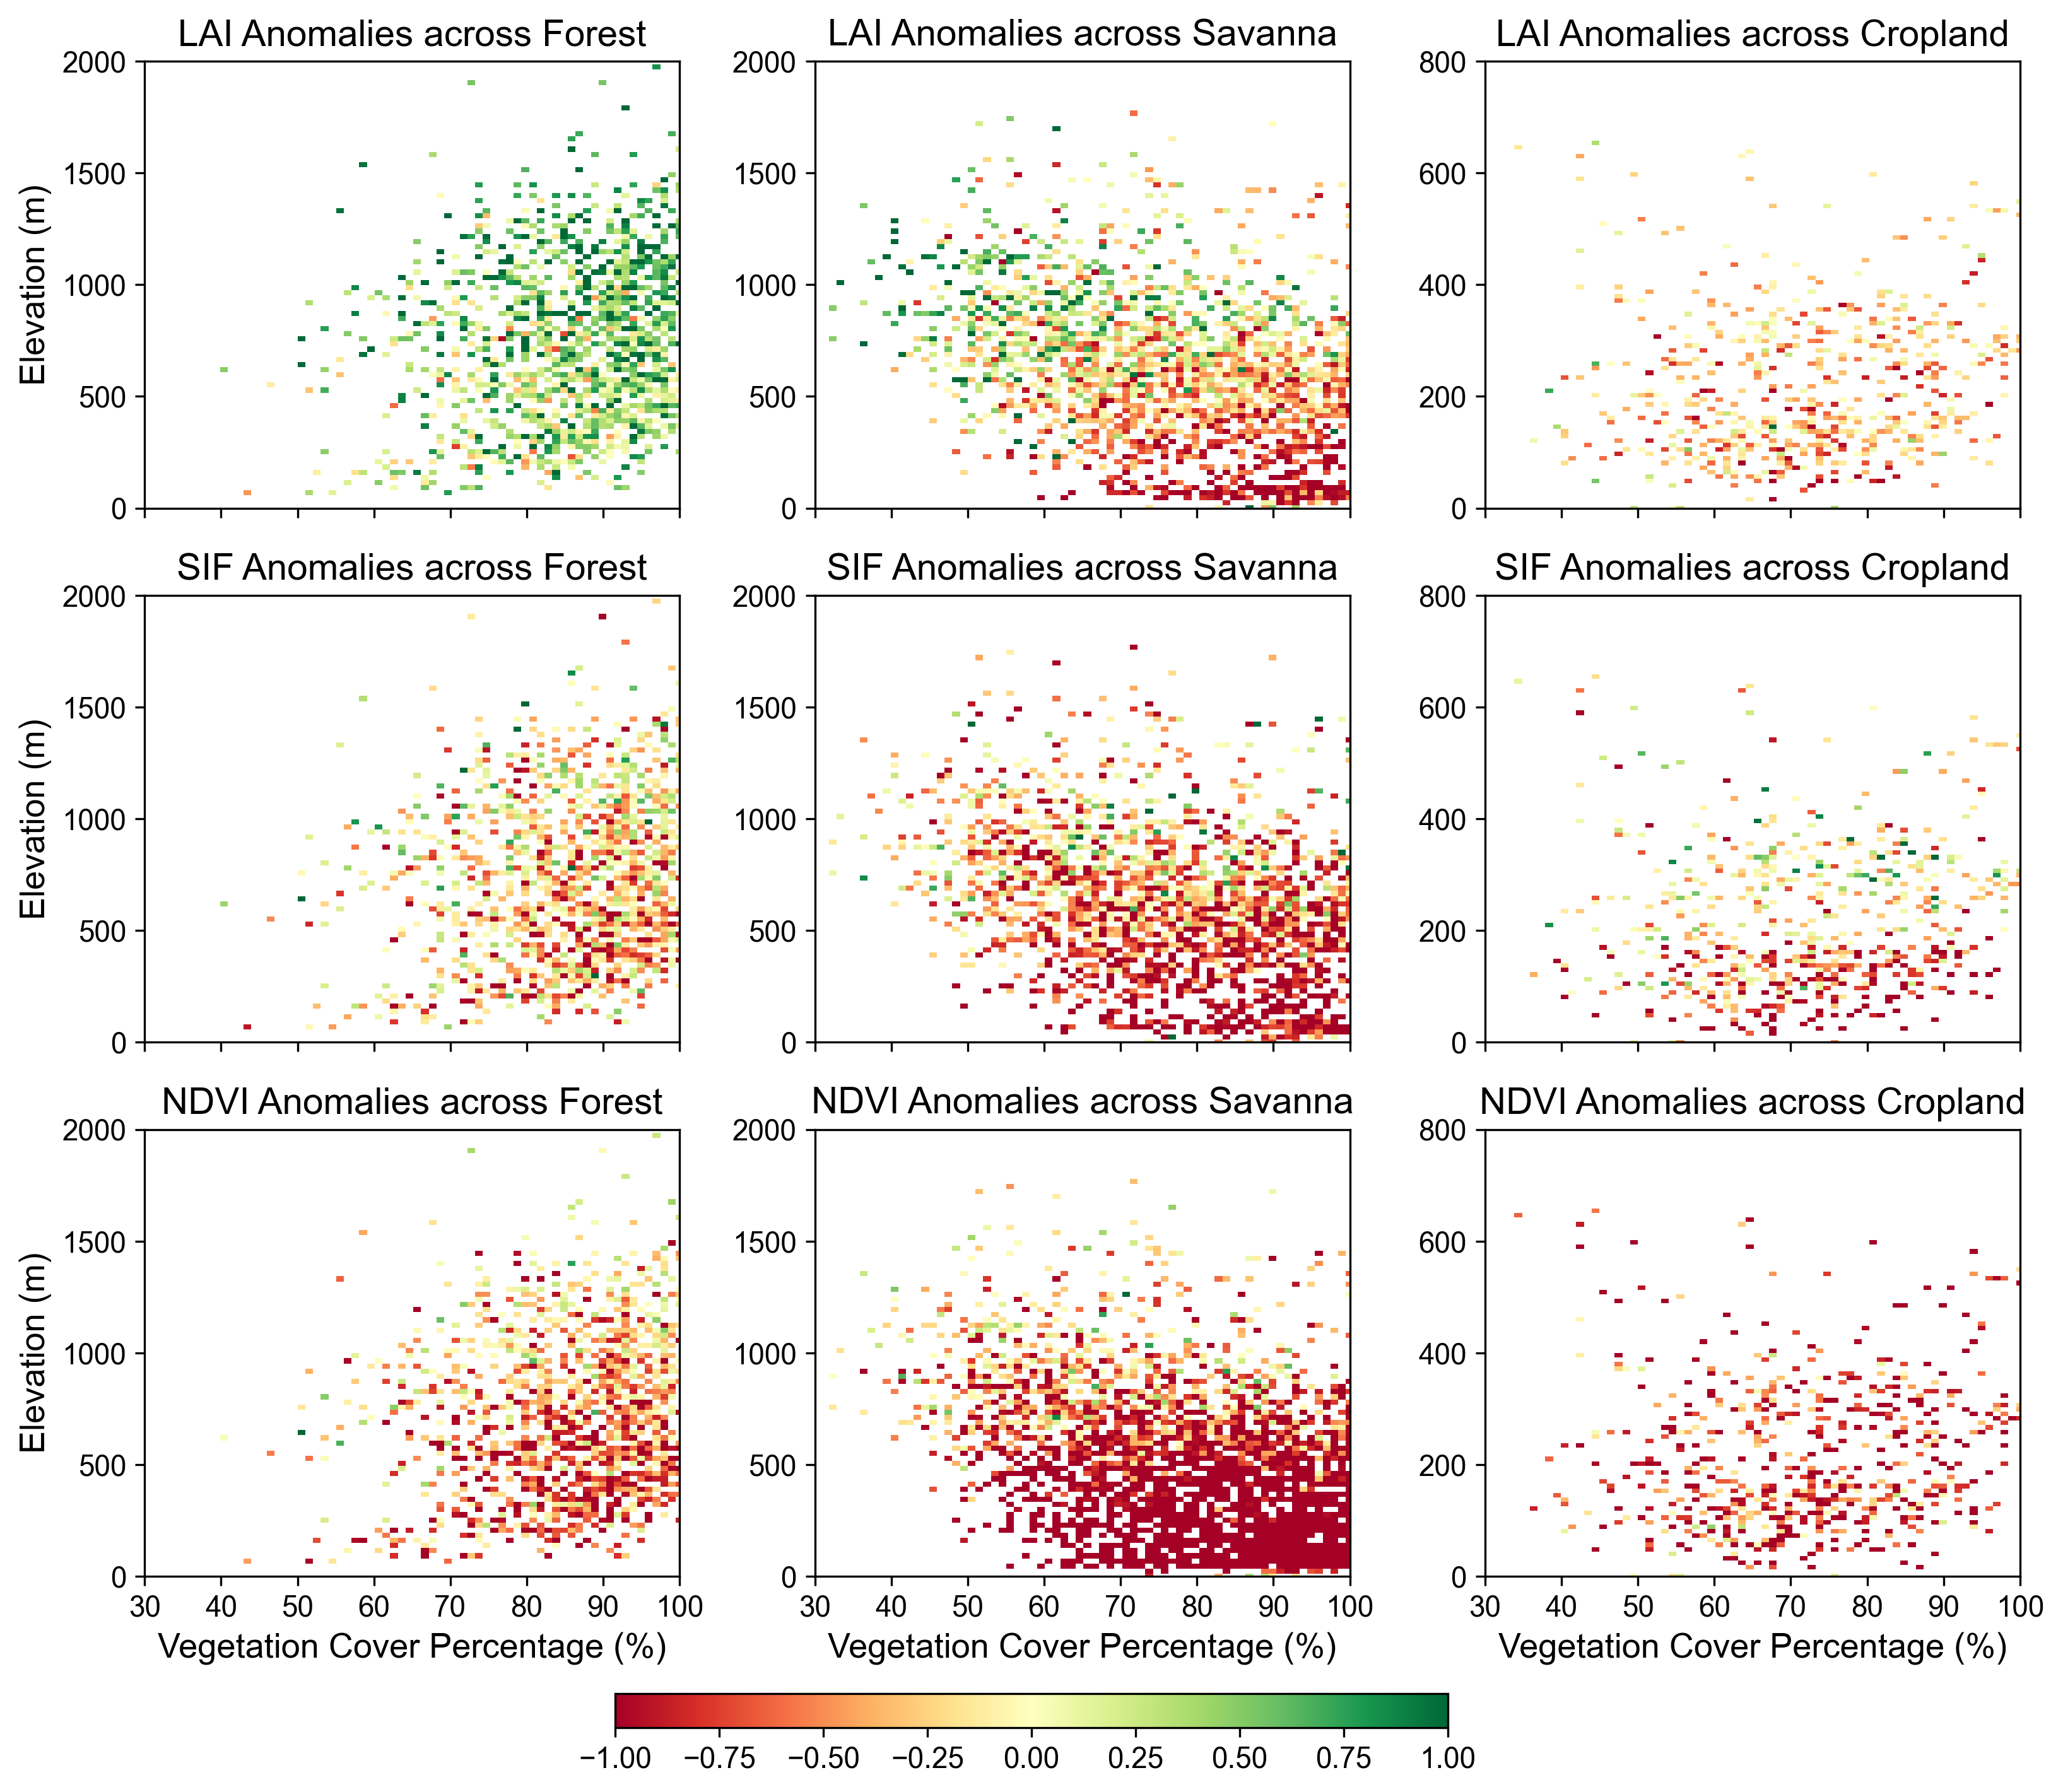

In [14]:
import matplotlib.cm as cm
cmap = cm.get_cmap('RdYlGn')
norm = mcolors.Normalize(vmin=-1, vmax=1) 
fig, axes = plt.subplots(3, 3, figsize=(11,9), dpi=300)
axes_flat = axes.flatten()
data = [bin1, bin2, bin3, bin4, bin5, bin6, bin7, bin8, bin9]
title = ['LAI Anomalies across Forest','LAI Anomalies across Savanna','LAI Anomalies across Cropland',
         'SIF Anomalies across Forest','SIF Anomalies across Savanna','SIF Anomalies across Cropland',
         'NDVI Anomalies across Forest','NDVI Anomalies across Savanna','NDVI Anomalies across Cropland']
dem_min = [0,0,0,0,0,0,0,0,0]
dem_max = [2000,2000,800,2000,2000,800,2000,2000,800]
per_min = [30,30,30,30,30,30,30,30,30]
per_max = [100,100,100,100,100,100,100,100,100]
for i, ax in enumerate(axes_flat):
    if i < len(data):  # Ensure we don't exceed the number of data arrays
        plot = data[i].plot(ax=ax, vmax=1, vmin=-1, cmap='RdYlGn', add_colorbar=False)
        ax.set_xlim(per_min[i], per_max[i])
        ax.set_ylim(dem_min[i],dem_max[i])
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title(title[i],fontsize=14)
        ax.set_yticks(np.linspace(dem_min[i], dem_max[i], num=5))
        ax.yaxis.set_tick_params(labelsize=11)
        ax.set_xticks(np.linspace(per_min[i], per_max[i], num=8))
        ax.set_xticklabels([])
        if i == 0 or i == 3 or i == 6:
            ax.set_ylabel('Elevation (m)', fontsize=13)
        if i == 6 or i == 7 or i == 8:
            ax.set_xticklabels([int(x) for x in np.linspace(per_min[i], per_max[i], num=8)], fontsize=11)
            ax.set_xlabel('Vegetation Cover Percentage (%)', fontsize=13)
            
fig.subplots_adjust(bottom=0.01)
cbar_ax = fig.add_axes([0.3, -0.02, 0.4, 0.02])  # Position: [left, bottom, width, height]
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=11)
plt.tight_layout(rect=[0, 0.12, 1, 1])
# plt.subplots_adjust(wspace=0.05, hspace=0.3)
plt.tight_layout()
plt.savefig(outpath+'7.eps', dpi=500, bbox_inches='tight') 
plt.show()